Data Science Work For Space Apps Challenge 

Goal: Develop a machine learning (ML) algorithm or neural network pipeline for the DSCOVR spacecraft's FC instrument to track and follow the changes in the peak solar wind speed (to provide early warning signs of a Carrington-like event)

Event Details: https://2022.spaceappschallenge.org/challenges/2022-challenges/carrington-event/details

In [190]:
import os
library_directory = '/home/colin/hackathons/spaceapps/cdf38_1-dist/lib'
os.environ["CDF_LIB"] = library_directory
from spacepy import pycdf

Step 1: Investigate Data

Provided Data:
- DSCOVER Magnetic Field Data Sets
- Wind Mission's Magnetic Field Data
- Wind Mission's Ion Parameters

Ground Truth:
- Wind's Magnetic Field Data
- Wind's ION Parameter Data

Considerations:
- Time period should be between a few months and a year (long enough to have complete representation of plasma conditions, short enough that instrument degredation does not become too noticable)
- Data discrepencies between Wind and DSCOVR should be reconciled; remove any major discrepencies

Locations: 
- (wind magnetic) https://cdaweb.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h2/2022/
- (wind ion) https://cdaweb.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/2022/ 
- (dscover magnetic) https://cdaweb.gsfc.nasa.gov/pub/data/dscovr/h0/mag/2022/

Download Wind (magnetic field) Data:

In [191]:
import wget
url = 'https://cdaweb.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h2/2022/wi_h2_mfi_20220101_v04.cdf'
filename = wget.download(url)	
# TO DO:
#   add names of all files to download to array 
#   download all files

In [192]:
cdf_wind = pycdf.CDF('wi_h2_mfi_20220101_v04.cdf')
print('These are the variables within this file:\n')
print(cdf_wind)

These are the variables within this file:

AMPL1_I: CDF_REAL4 [1440, 3, 8]
AMPL1_O: CDF_REAL4 [1440, 3, 8]
BF1: CDF_REAL4 [925803, 1]
BGSE: CDF_REAL4 [925803, 3]
BGSM: CDF_REAL4 [925803, 3]
Epoch: CDF_EPOCH [925803, 1]
Epoch1: CDF_EPOCH [1440, 1]
FLAG1_I: CDF_INT4 [1440, 1]
FLAG1_O: CDF_INT4 [1440, 1]
MAG_MODE: CDF_INT4 [925803, 1]
NUM1_PTS_I: CDF_INT4 [1440, 1]
NUM1_PTS_O: CDF_INT4 [1440, 1]
ORTH1_I: CDF_REAL8 [1440, 3, 3]
ORTH1_O: CDF_REAL8 [1440, 3, 3]
PAYLD1_I: CDF_REAL8 [1440, 3, 3]
PAYLD1_O: CDF_REAL8 [1440, 3, 3]
RANGE: CDF_INT4 [925803, 1]
SENS1_I: CDF_REAL4 [1440, 3, 8]
SENS1_O: CDF_REAL4 [1440, 3, 8]
SPC_MODE: CDF_INT4 [925803, 1]
Time1_PB5: CDF_INT4 [1440, 3]
Time_PB5: CDF_INT4 [925803, 3]
ZERO1_I: CDF_REAL4 [1440, 3, 8]
ZERO1_O: CDF_REAL4 [1440, 3, 8]
cartesian: CDF_CHAR*11 [3] NRV
format_time: CDF_CHAR*2 [3] NRV
label_bgse: CDF_CHAR*8 [3] NRV
label_bgsm: CDF_CHAR*8 [3] NRV
label_time: CDF_CHAR*27 [3] NRV
unit_time: CDF_CHAR*4 [3] NRV


In [193]:
print('This is the global metadata record of the file:\n')
print(cdf_wind.attrs)

This is the global metadata record of the file:

ADID_ref: NSSD0141 [CDF_CHAR]
Attitude_file: wi_at_pre_20211231_v02.cdf [CDF_CHAR]
               wi_at_pre_20220101_v02.cdf [CDF_CHAR]
               wi_at_pre_20220102_v02.cdf [CDF_CHAR]
Data_type: H2>High-resolution Definitive Data [CDF_CHAR]
Data_version: 04 [CDF_CHAR]
Descriptor: MFI>Magnetic Fields Investigation [CDF_CHAR]
Discipline: Space Physics>Heliospheric Science [CDF_CHAR]
HKlvl_0_file: wi_lz_scr_20211231_v01.dat [CDF_CHAR]
              wi_lz_scr_20220101_v01.dat [CDF_CHAR]
              wi_lz_scr_20220102_v01.dat [CDF_CHAR]
Instrument_type: Magnetic Fields (space) [CDF_CHAR]
Level_0_file: wi_lz_mfi_20211231_v01.dat [CDF_CHAR]
              wi_lz_mfi_20220101_v01.dat [CDF_CHAR]
              wi_lz_mfi_20220102_v01.dat [CDF_CHAR]
Logical_file_id: wi_h2_mfi_00000000_v00 [CDF_CHAR]
Logical_source: wi_h2_mfi [CDF_CHAR]
Logical_source_description: Wind Magnetic Fields Investigation, High-resolution Definitive Data [CDF_CHAR]
MOD

In [194]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = cdf_wind['Epoch'][...]
print(x)
y = cdf_wind['BGSE'][...]
y_df = pd.DataFrame(y)
y_df_filtered = y_df[(y_df > -2147483648)] 

fig, ax = plt.subplots(figsize=(7,2), constrained_layout=True)
ax.plot(x, y_df_filtered)
ax.set_xlabel('ms')
ax.set_ylabel('nT')
plt.title('Wind Data')
fig.set_facecolor('lightsteelblue')

[[datetime.datetime(2022, 1, 1, 0, 0, 0, 78000)]
 [datetime.datetime(2022, 1, 1, 0, 0, 0, 170000)]
 [datetime.datetime(2022, 1, 1, 0, 0, 0, 262000)]
 ...
 [datetime.datetime(2022, 1, 1, 23, 59, 59, 754000)]
 [datetime.datetime(2022, 1, 1, 23, 59, 59, 846000)]
 [datetime.datetime(2022, 1, 1, 23, 59, 59, 938000)]]


Download DSCOVR Data

In [ ]:
url = 'https://cdaweb.gsfc.nasa.gov/pub/data/dscovr/h0/mag/2022/dscovr_h0_mag_20220101_v01.cdf'
filename = wget.download(url)	

In [ ]:
cdf_dscovr = pycdf.CDF('dscovr_h0_mag_20220101_v01.cdf')
print('These are the variables within this file:\n')
print(cdf_dscovr)

These are the variables within this file:

B1F1: CDF_REAL4 [86400]
B1GSE: CDF_REAL4 [86400, 3]
B1RTN: CDF_REAL4 [86400, 3]
B1SDF1: CDF_REAL4 [86400]
B1SDGSE: CDF_REAL4 [86400, 3]
B1SDRTN: CDF_REAL4 [86400, 3]
Epoch1: CDF_EPOCH [86400]
FLAG1: CDF_INT2 [86400]
NUM1_PTS: CDF_INT4 [86400]
RANGE1: CDF_INT2 [86400]
SENS: CDF_REAL4 [3, 8] NRV
Time1_PB5: CDF_INT4 [86400, 3]
ZERO: CDF_REAL4 [3, 8] NRV
format_time: CDF_CHAR*2 [3] NRV
label_bgse: CDF_CHAR*8 [3] NRV
label_brtn: CDF_CHAR*8 [3] NRV
label_bsdgse: CDF_CHAR*14 [3] NRV
label_bsdrtn: CDF_CHAR*14 [3] NRV
label_time: CDF_CHAR*27 [3] NRV
unit_time: CDF_CHAR*4 [3] NRV


In [ ]:
print(cdf_dscovr['B1F1'].attrs)
print("\n")
print(cdf_dscovr['B1GSE'].attrs)
print("\n")
print(cdf_dscovr['B1RTN'].attrs)
print("\n")
print(cdf_dscovr['Time1_PB5'].attrs)

CATDESC: Magnetic field magnitude (1 sec) [CDF_CHAR]
DEPEND_0: Epoch1 [CDF_CHAR]
DISPLAY_TYPE: time_series [CDF_CHAR]
FIELDNAM: Magnetic field magnitude (1 sec) [CDF_CHAR]
FILLVAL: -1e+31 [CDF_FLOAT]
FORMAT: E13.6 [CDF_CHAR]
LABLAXIS: B [CDF_CHAR]
MONOTON: FALSE [CDF_CHAR]
SCALEMAX: 10.33799 [CDF_FLOAT]
SCALEMIN: 6.200893 [CDF_FLOAT]
SCALETYP: LINEAR [CDF_CHAR]
TIME_RES: 1 sec [CDF_CHAR]
UNITS: nT [CDF_CHAR]
VALIDMAX: 65534.0 [CDF_FLOAT]
VALIDMIN: 0.0 [CDF_FLOAT]
VAR_NOTES: Average of the magnitude (F1) [CDF_CHAR]
VAR_TYPE: data [CDF_CHAR]


CATDESC: Magnetic field vector in GSE cartesian coordinates (1 sec) [CDF_CHAR]
DEPEND_0: Epoch1 [CDF_CHAR]
DISPLAY_TYPE: time_series [CDF_CHAR]
FIELDNAM: Magnetic field vector in GSE cartesian coordinates (1 sec) [CDF_CHAR]
FILLVAL: -1e+31 [CDF_FLOAT]
FORMAT: E13.6 [CDF_CHAR]
LABL_PTR_1: label_bgse [CDF_CHAR]
MONOTON: FALSE [CDF_CHAR]
SCALEMAX: [3.208676 9.184736 9.146015] [CDF_FLOAT]
SCALEMIN: [-9.118552  -6.4383945 -9.388936 ] [CDF_FLOAT]
SCALETY

In [ ]:
print('This is the global metadata record of the file:\n')
print(cdf_dscovr.attrs)

This is the global metadata record of the file:

Data_type: H0>1-sec Definitive Data [CDF_CHAR]
Data_version: 1 [CDF_CHAR]
Descriptor: MAG>Fluxgate Magnetometer [CDF_CHAR]
Discipline: Space Physics>Heliospheric Science [CDF_CHAR]
File_naming_convention: source_datatype_descriptor_yyyyMMdd [CDF_CHAR]
Instrument_type: Magnetic Fields (space) [CDF_CHAR]
Logical_file_id: dscovr_h0_mag_20220101_v01 [CDF_CHAR]
Logical_source: dscovr_h0_mag [CDF_CHAR]
Logical_source_description: DSCOVR Fluxgate Magnetometer 1-sec Definitive Data [CDF_CHAR]
MODS: 12/01/2016 Initial release [CDF_CHAR]
Mission_group: DSCOVR [CDF_CHAR]
PI_affiliation: UMBC, NASA/GSFC [CDF_CHAR]
PI_name: A. Koval [CDF_CHAR]
Processing_date: Mon Feb 28 20:19:02 2022 UTC [CDF_CHAR]
Project: DSCOVR>Deep Space Climate Observatory [CDF_CHAR]
Software_version: V01.00 [CDF_CHAR]
Source_name: DSCOVR>Deep Space Climate Observatory [CDF_CHAR]
TEXT: DSCOVR Fluxgate Magnetometer 1-sec Definitive Data                               [CDF_CHAR]
T

[datetime.datetime(2022, 1, 1, 0, 0, 0, 500000)
 datetime.datetime(2022, 1, 1, 0, 0, 1, 500000)
 datetime.datetime(2022, 1, 1, 0, 0, 2, 500000) ...
 datetime.datetime(2022, 1, 1, 23, 59, 57, 500000)
 datetime.datetime(2022, 1, 1, 23, 59, 58, 500000)
 datetime.datetime(2022, 1, 1, 23, 59, 59, 500000)]


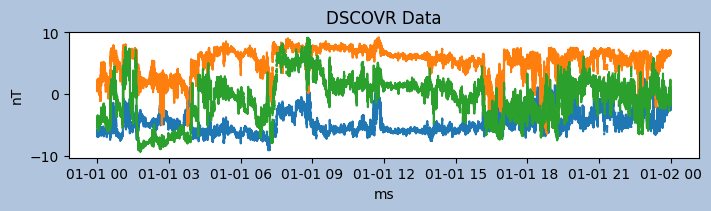

In [ ]:
x = cdf_dscovr['Epoch1'][...]
print(x)
y = cdf_dscovr['B1GSE'][...]
y_df = pd.DataFrame(y)
y_df_filtered = y_df[(y_df > -2147483648)] 

fig, ax = plt.subplots(figsize=(7,2), constrained_layout=True)
ax.plot(x, y_df_filtered)
ax.set_xlabel('ms')
ax.set_ylabel('nT')
plt.title('DSCOVR Data')
fig.set_facecolor('lightsteelblue')
